In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv(r'/content/avocado-csv.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df = df.drop(columns=['Unnamed: 0','4046','4225','4770','Date'],axis=1)

In [6]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
def get_avarage(df,column):
    """
    Description: This function to return the average value of the column

    Arguments:
        df: the DataFrame.
        column: the selected column.
    Returns:
        column's average
    """
    return sum(df[column])/len(df)

In [8]:
def get_avarge_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame.
        column1:the first column.
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """

    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)

    return column1_column2_sorted_data

In [9]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame.
        xlabel: the label of the first column.
        ylabel: the label of the second column.
    Returns:
        None
    """

    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

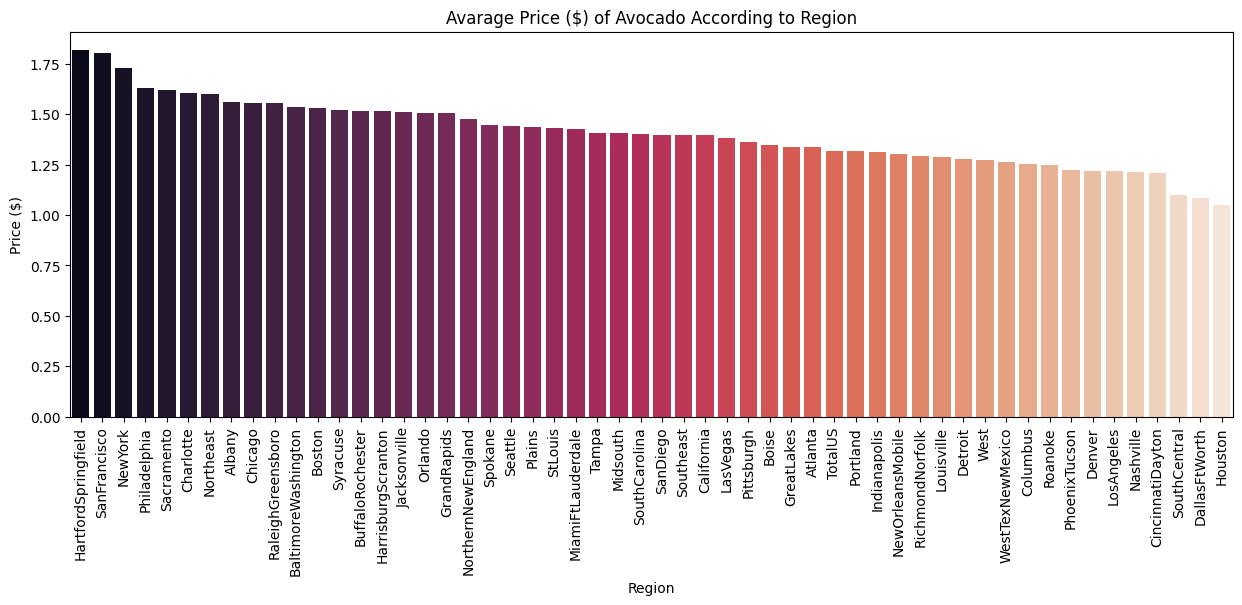

In [10]:
data1 = get_avarge_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price ($)')

In [11]:
print(data1['column1'].iloc[-1], " is the region producing avocado with the lowest price.")

Houston  is the region producing avocado with the lowest price.


In [12]:
# what is the highest region of avocado production

In [13]:
# Checking  if there are outlier values or not.

Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

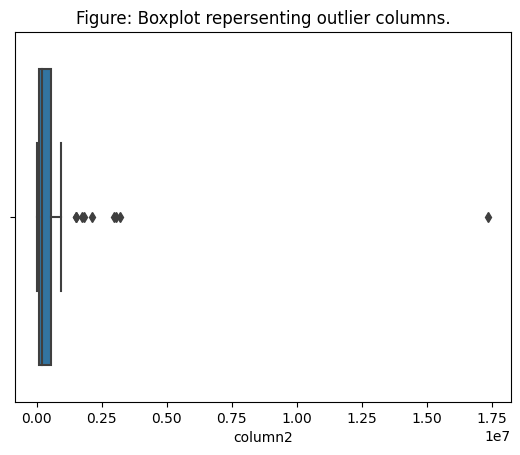

In [14]:
data2 = get_avarge_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [15]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1],"is outlier value")

TotalUS is outlier value


In [16]:
# Remove the outlier values

In [17]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

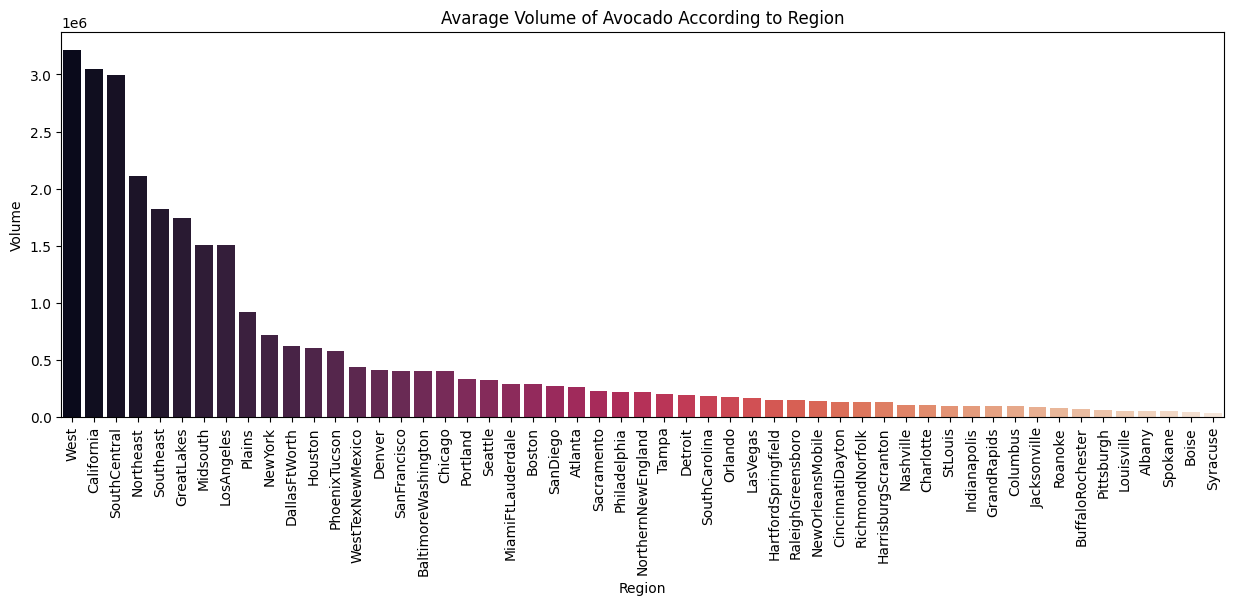

In [18]:
plot(data2,'Region','Volume')

In [19]:
# What is the average avocado prices in each year?

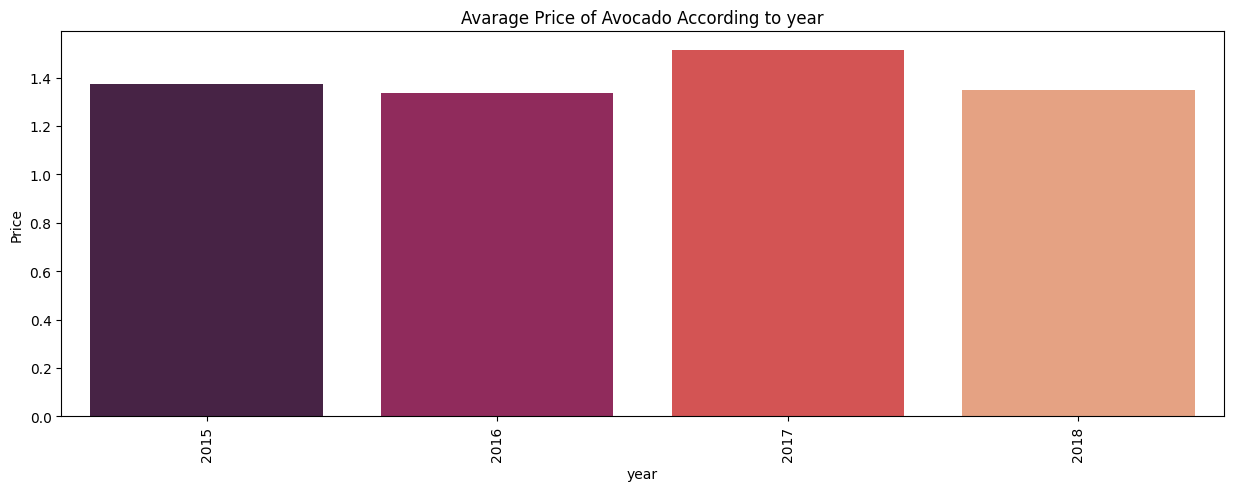

In [20]:
data3 = get_avarge_between_two_columns(df,'year','AveragePrice')
plot(data3,'year','Price')

In [21]:
# What is the average avocado volume in each year?

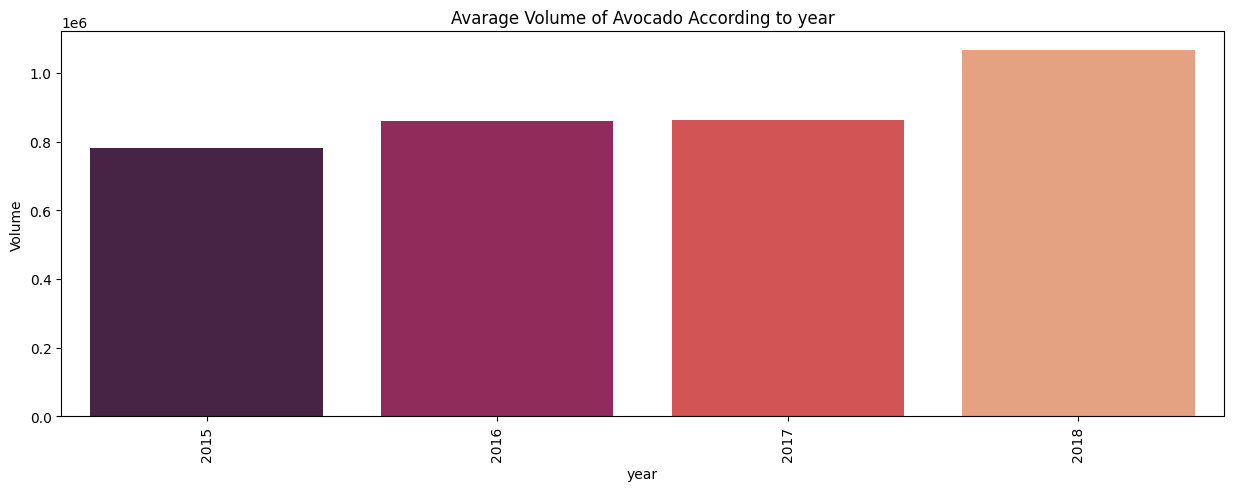

In [22]:
data4 = get_avarge_between_two_columns(df,'year','Total Volume')
plot(data4,'year','Volume')

In [23]:
# Data Modeling
#we built the regrassion model by using linear regrassion from sklearn to predict the Avocado Price
# Changing some column types in to catagories

In [24]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [26]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [27]:
# split data into x and y
X = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

# split data into training and testing dataset
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [28]:
print("training set:",X_train.shape,'-',y_train.shape[0],'samples')
print("testing set:",X_test.shape,'-',y_test.shape[0], 'samples')

training set: (12774, 8) - 12774 samples
testing set: (5475, 8) - 5475 samples


In [36]:
# build and fit the model

from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(X_train)

# Transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [37]:
# Evaluate the Results:


In [38]:
# Prediction and Calculate the accuracy for the testing dataset
test_pre = model.predict(X_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset",test_score*100)

The accuracy of testing dataset -1.4505457449012067e+23


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [42]:
# Prediction and Calculate the accuracy for the training dataset
train_pre = model.predict(X_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of training dataset",train_score*100)

The accuracy of training dataset -1.1461742718581598e+23


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
